# Multiclass Neural Network
<hr>

To practice multi-class classification, we are going to build a neural network to classify images of different items of clothings.

**Contents:**
- Getting familiar with the data
- Building multi-class model
- Normalizing data
- Plotting History
- Finding the ideal learning rate
- Evaluation method
- Confusion Matrix

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and testing
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 

4422102/4422102 [==============================] - 2s 0us/step


## Getting Familiar with the data

In [4]:
# Show the first training example
print(f'Training Sample: {X_train[0]}\nTraining label: {y_train[0]}')

Training Sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

> The labels are: **0 -> T-shirt/top, 1 -> Trouser, 2 -> Pullover, 3 -> Dress, 4 -> Coat, 5 -> Sandal, 6 -> Shirt, 7 -> Sneaker, 8 -> Bag, 9 -> Ankle boot**

In [5]:
# check the shape of simple example

X_train[0].shape, y_train[0].shape

((28, 28), ())

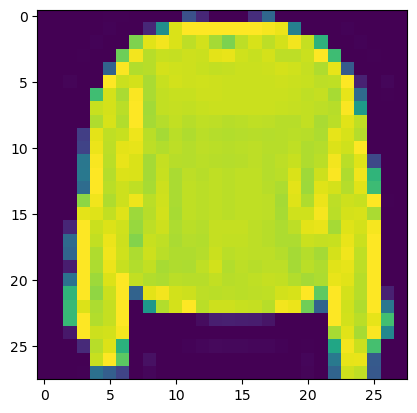

In [7]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(X_train[7]);

In [8]:
# Check out sample label
y_train[7]

2

In [9]:
# Create readable of training label
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

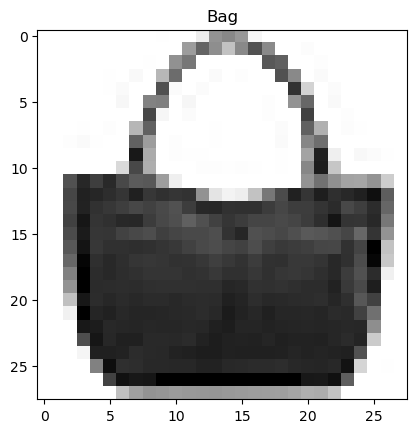

In [14]:
# Plot an example image and its label
index_of_choice = 100
plt.imshow(X_train[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[y_train[index_of_choice]]);

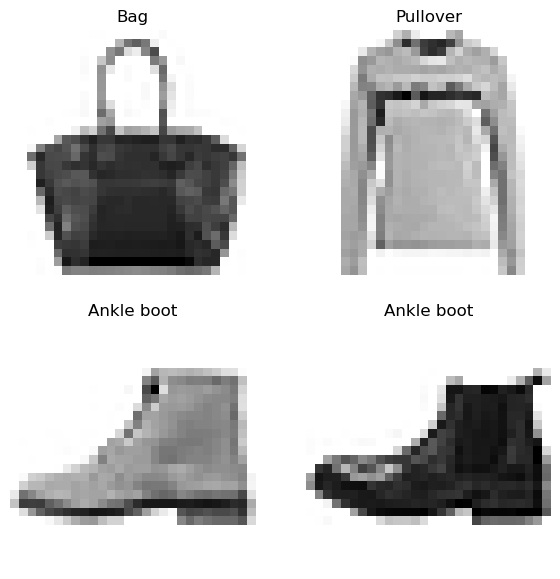

In [20]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_indx = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_indx ], cmap=plt.cm.binary)
    plt.title(class_names[y_train[rand_indx]])
    plt.axis(False)

## Building a Multi-Class Model

- Input Shape: 28 x 28 (the shape of one image)
- Output Shape: 10 (one per class of clothing)
- Loss function: `tf.keras.losses.CategoricalCrossentropy()`
    - If your labels are one-hot encoded, use CategoricalCrossentropy()
    - If your labels are integer form use SparseCategoricalCrossentropy()
- Output layer activation: `softmax`

In [21]:
# Check the input shape
X_train[0].shape

(28, 28)

In [22]:
# Output shape (i.e) how many classes
len(class_names)

10

**Flatten**

In [28]:
# Data needs to be flattened
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [29]:
28 * 28

784

In [34]:
# Set random seed
tf.random.set_seed(42)

# 1. Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4497 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0999
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3029 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3021 - accuracy: 0.0993 - val_loss: 2.2816 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3014 - accuracy: 0.0989 - val_loss: 2.2711 - val_accuracy:

> **CategoricalCrossentropy** is used when the labels are `hot-encoded` if they are`integers` please use **SparseCategoricalCrossentropy**.

**One hot the training labels (y_train)**

In [31]:
tf.one_hot(y_train[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [35]:
# Set random seed
tf.random.set_seed(42)

# 1. Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_2.fit(X_train, tf.one_hot(y_train, depth=10), 
                             epochs=10, validation_data=(X_test, tf.one_hot(y_test, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2677 - accuracy: 0.1265 - val_loss: 2.1286 - val_accuracy: 0.1888
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0928 - accuracy: 0.1946 - val_loss: 2.0175 - val_accuracy: 0.2284
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7142 - accuracy: 0.2988 - val_loss: 1.6473 - val_accuracy: 0.3320
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5072 - accuracy: 0.3803 - val_loss: 1.4597 - val_accuracy: 0.3947
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4061 - accuracy: 0.4027 - val_loss: 1.4394 - val_accuracy: 0.4170
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3538 - accuracy: 0.4132 - val_loss: 1.3558 - val_accuracy: 0.4165
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3559 - accuracy: 0.4162 - val_loss: 1.3450 - val_accuracy:

**NOTE:** The training and validation accuracy of 43% and 44% is still better than guessing. Had it been the model was guess, it would be around **10%**. $100 / 10 = 10$ 

In [36]:
# Check the model summary
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Check the min and max values of the training data
X_train.min(), X_train.max()

(0, 255)

## Normalizing the data

- Range of 0 and 1
- We can the training and testing data in the above range by dividing by the maximum

In [39]:
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

# Check the min and max
X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

In [41]:
# Set random seed
tf.random.set_seed(42)

# 1. Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# 3. Fit the model
norm_history = model_3.fit(X_train_norm, tf.one_hot(y_train, depth=10), 
                             epochs=10, validation_data=(X_test_norm, tf.one_hot(y_test, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1741 - accuracy: 0.5239 - val_loss: 0.8536 - val_accuracy: 0.6675
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8122 - accuracy: 0.6827 - val_loss: 0.8051 - val_accuracy: 0.6847
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7744 - accuracy: 0.6962 - val_loss: 0.7961 - val_accuracy: 0.6918
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7507 - accuracy: 0.7088 - val_loss: 0.7607 - val_accuracy: 0.7120
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7234 - accuracy: 0.7290 - val_loss: 0.7273 - val_accuracy: 0.7346
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6764 - accuracy: 0.7524 - val_loss: 0.6994 - val_accuracy: 0.7495
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6420 - accuracy: 0.7625 - val_loss: 0.6675 - val_accuracy:

## Ploting data history

In [43]:
import pandas as pd
pd.DataFrame(non_norm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.267704,0.126500,2.128598,0.1888
1,2.092751,0.194650,2.017521,0.2284
2,1.714240,0.298850,1.647280,0.3320
3,1.507167,0.380300,1.459700,0.3947
4,1.406056,0.402700,1.439396,0.4170
5,1.353839,0.413167,1.355821,0.4165
6,1.355852,0.416183,1.344976,0.4245
7,1.320109,0.421783,1.361876,0.4143
8,1.316701,0.426983,1.345742,0.4349
9,1.296949,0.436000,1.321653,0.4427


In [44]:
# Normalized Data model history
pd.DataFrame(norm_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.174076,0.523917,0.853609,0.6675
1,0.812228,0.682700,0.805120,0.6847
2,0.774427,0.696183,0.796102,0.6918
3,0.750683,0.708817,0.760693,0.7120
4,0.723353,0.728967,0.727296,0.7346
5,0.676375,0.752433,0.699378,0.7495
6,0.641984,0.762500,0.667491,0.7529
7,0.621762,0.769050,0.657057,0.7627
8,0.610660,0.773567,0.635636,0.7688
9,0.601292,0.778467,0.628106,0.7709


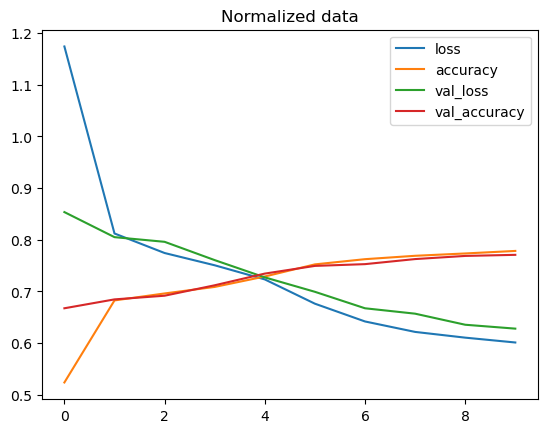

In [51]:
pd.DataFrame(norm_history.history).plot(title="Normalized data");

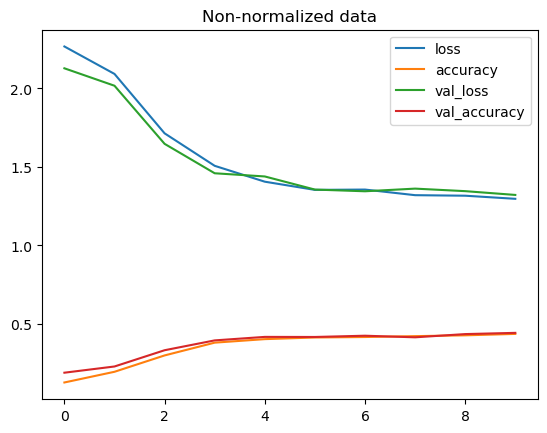

In [50]:
# Non-normalized Data model history
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data");

> **Note:** The same model with even slightly different data can produce *dramatically* different results. So, when you are comparing models, it's important to make sure you're comparing them on the same criteria (e.g same architecture but different data or same data but different architecture.)

## Finding the ideal learning rate

In [53]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    # output layer
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 2. Compile the model
model_4.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 3. Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 4. Fit the model
find_lr_history = model_4.fit(X_train_norm, 
                              y_train, 
                              epochs=40, 
                              validation_data=(X_test_norm, y_test), 
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1397 - accuracy: 0.5652 - val_loss: 0.7814 - val_accuracy: 0.7299 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6999 - accuracy: 0.7552 - val_loss: 0.7001 - val_accuracy: 0.7454 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6454 - accuracy: 0.7707 - val_loss: 0.6495 - val_accuracy: 0.7696 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6244 - accuracy: 0.7771 - val_loss: 0.6332 - val_accuracy: 0.7748 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6134 - accuracy: 0.7807 - val_loss: 0.6210 - val_accuracy: 0.7739 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6047 - accuracy: 0.7846 - val_loss: 0.6367 - val_accuracy: 0.7754 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

**Plot the learning rate decay curve**

Text(0.5, 1.0, 'Finding the ideal learning rate')

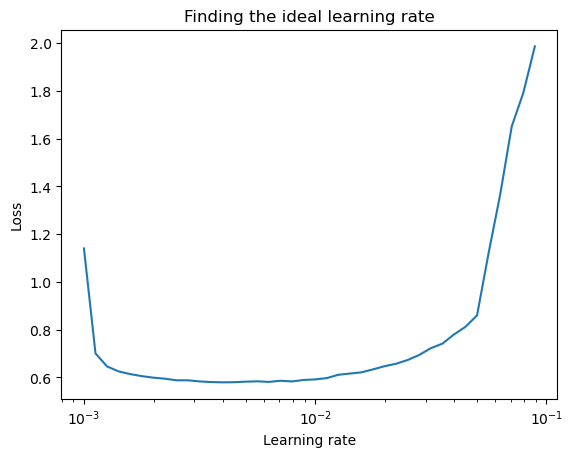

In [54]:
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

> The **ideal learning rate** is where (region) the loss decrease sharply and the lowest point at the region.

In [56]:
# For this problem, the ideal learning rate is the default `Adam` learning rate
10**-3

0.001

In [58]:
# Refit a model with the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    # output layer
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 2. Compile the model
model_5.compile(loss="sparse_categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# 3. Fit the model
ideal_lr_history = model_5.fit(X_train_norm, 
                              y_train, 
                              epochs=20, 
                              validation_data=(X_test_norm, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3265 - accuracy: 0.4882 - val_loss: 1.0222 - val_accuracy: 0.5944
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9033 - accuracy: 0.6457 - val_loss: 0.8601 - val_accuracy: 0.6647
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8177 - accuracy: 0.6773 - val_loss: 0.7958 - val_accuracy: 0.7108
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7530 - accuracy: 0.7245 - val_loss: 0.7611 - val_accuracy: 0.7353
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7140 - accuracy: 0.7468 - val_loss: 0.7218 - val_accuracy: 0.7514
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6921 - accuracy: 0.7552 - val_loss: 0.7160 - val_accuracy: 0.7501
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6791 - accuracy: 0.7581 - val_loss: 0.7052 - val_accuracy:

## Evaluate Multi-class classification model
To evaluate our multi-class classification model we could:
- Evaluate its performance using other classification metrics (such as a confusion matrix)
- Assess some of its predictions (through visualizations)
- Improve its results (by training it for longer or changing the architecture)
- Save and export it for use in an application